In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [8]:
# Read AirBnb data
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [10]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [11]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [36]:
# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Drop duplicates and unnecessary columns
df = df.drop_duplicates()
df = df.drop(['house_rules', 'license'], axis=1, errors='ignore')

# Remove $ and commas from price and service fee
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename columns
df = df.rename(columns={'price':'$price', 'service fee':'$service fee'})

# Drop rows with missing values
df = df.dropna()

# Convert to appropriate types
df['$price'] = df['$price'].astype(float)
df['$service fee'] = df['$service fee'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['construction year'] = pd.to_numeric(df['construction year'], errors='coerce')

# Correct 'brookln' typo
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Remove outliers in availability 365
df = df.drop(df[df['availability 365'] >500].index)


In [37]:
df.duplicated().value_counts()

,count
False,81242


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81242 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81242 non-null  object        
 1   name                            81242 non-null  object        
 2   host id                         81242 non-null  object        
 3   host_identity_verified          81242 non-null  object        
 4   host name                       81242 non-null  object        
 5   neighbourhood group             81242 non-null  object        
 6   neighbourhood                   81242 non-null  object        
 7   lat                             81242 non-null  float64       
 8   long                            81242 non-null  float64       
 9   country                         81242 non-null  object        
 10  country code                    81242 non-null  object        
 11  instan

In [39]:
df.describe()

,lat,long,instant_bookable,construction year,$price,$service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,81242.000000,81242.000000,81242.000000,81242.00000,81242.000000,81242.000000,81242.000000,81242.000000,81242,81242.000000,81242.000000,81242.000000,81242.000000
mean,40.727256,-73.948263,0.497464,2012.48987,626.625760,125.326211,7.418047,32.010303,2019-06-21 03:51:10.027817984,1.390924,3.286305,7.106792,135.037148
min,40.504560,-74.249840,0.000000,2003.00000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687620,-73.982070,0.000000,2007.00000,341.000000,68.000000,2.000000,3.000000,2018-11-04 00:00:00,0.230000,2.000000,1.000000,5.000000
50%,40.721250,-73.953590,0.000000,2012.00000,626.000000,125.000000,3.000000,11.000000,2019-06-14 00:00:00,0.760000,3.000000,1.000000,92.000000
75%,40.762490,-73.930480,1.000000,2017.00000,915.000000,183.000000,5.000000,38.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.00000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.056391,0.050625,0.499997,5.76077,331.762832,66.355878,28.366255,51.665773,NaN,1.761280,1.278717,29.854202,128.464648


In [41]:
#what are different property types in the dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,42930
Private room,36590
Shared room,1614
Hotel room,108


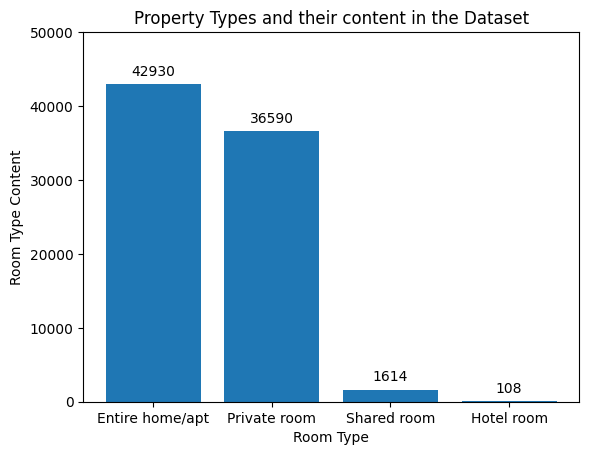

In [42]:
#room type content on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type')
plt.ylabel('Room Type Content');
plt.title('Property Types and their content in the Dataset');

In [46]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,33709
Manhattan,33541
Queens,10946
Bronx,2241
Staten Island,805


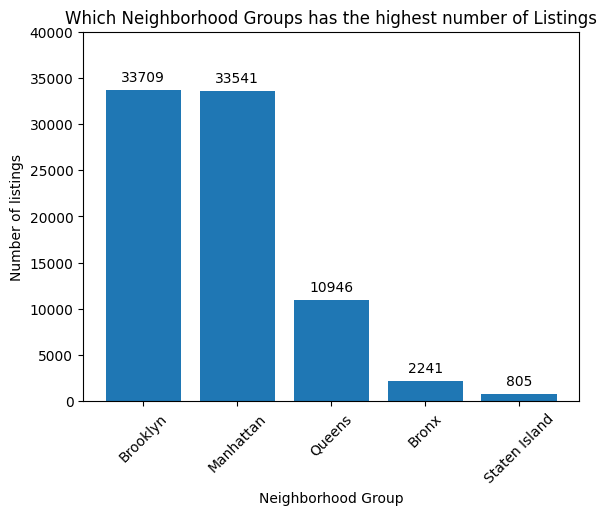

In [53]:

hood_group = df['neighbourhood group'].value_counts().to_frame(name='count')
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding = 4);
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of listings')
plt.xticks(rotation=45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

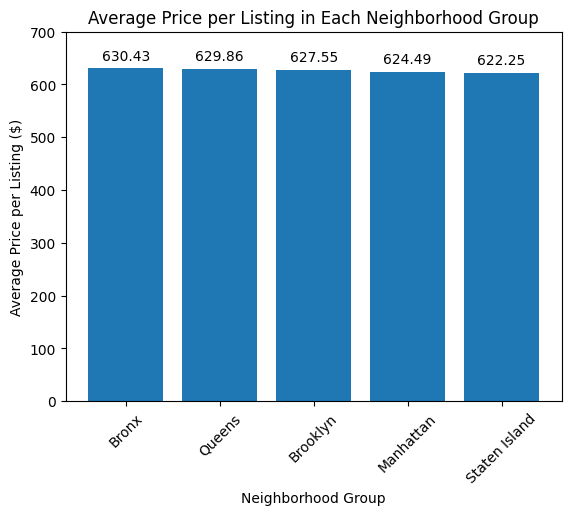

In [54]:
# Compute average price per neighborhood group
avg_price = df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending=False).to_frame()

# Create the bar chart
bars = plt.bar(avg_price.index, avg_price['$price'])

# Add value labels on each bar
plt.bar_label(bars, labels=avg_price['$price'].round(2), label_type='edge', padding=4)

# Style the chart
plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listing ($)')
plt.title('Average Price per Listing in Each Neighborhood Group')
plt.xticks(rotation=45)

plt.show()

Text(0.5, 1.0, 'Average Price for properties in each Construction year')

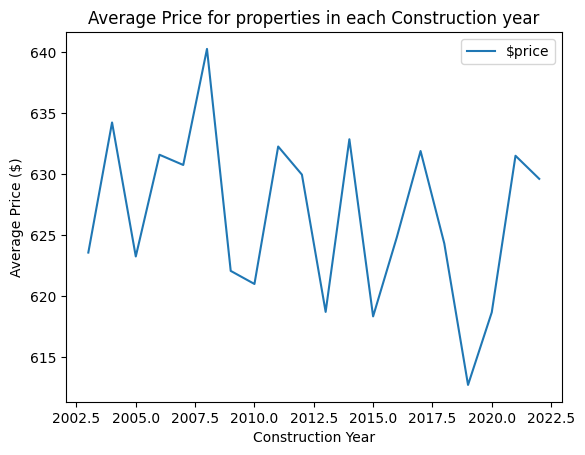

In [60]:
# is there a relationship between the construction year of property & price?
df.groupby(df['construction year'])['$price'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price for properties in each Construction year')


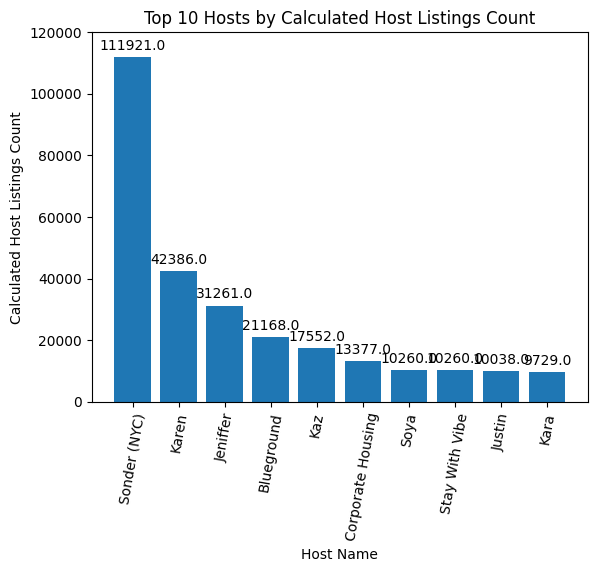

In [62]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,labels=hosts.loc[:,'calculated host listings count'],label_type='edge',padding=3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation=80);
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listings Count');

In [64]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['reviews per month'].mean().sort_values(ascending=False).to_frame()
review

,reviews per month
host_identity_verified,
unconfirmed,1.391939
verified,1.389910


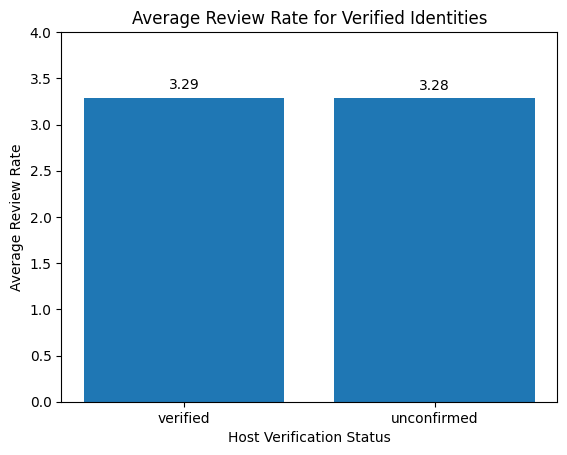

In [71]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

review_bar = plt.bar(review.index, review['review rate number'])
plt.bar_label(review_bar, labels=round(review['review rate number'], 2), padding=4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Verified Identities')
plt.show()


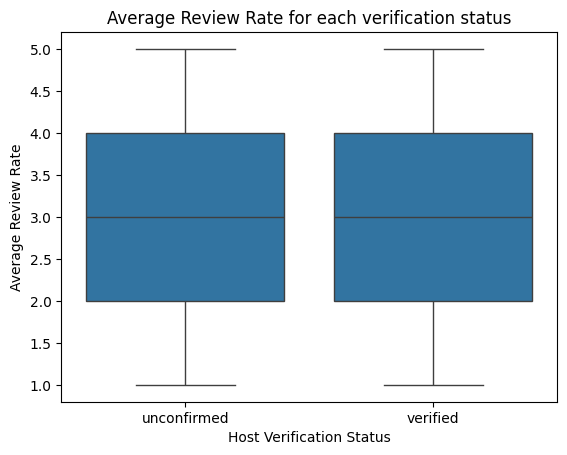

In [74]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each verification status');

In [76]:
# IS THERE A COREELATION B/w price of a  listing and its service fee?
df['$price'].corr(df['$service fee'])


np.float64(0.9999909005366617)

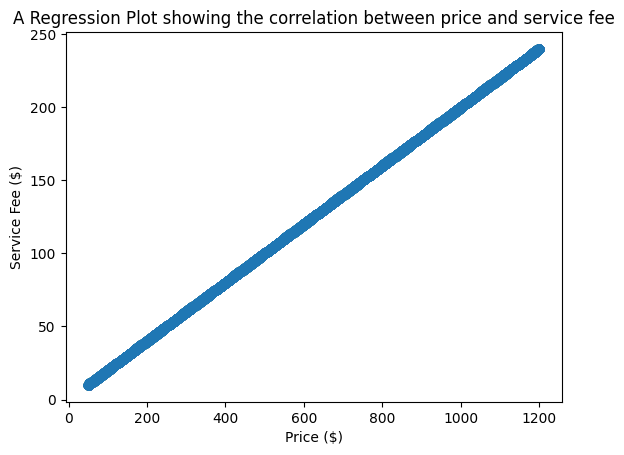

In [77]:
sns.regplot(data=df,x='$price',y='$service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation between price and service fee');

In [78]:
#What is the average review rate number for lisings and does it very hard based on the neighborhood group and room type ?
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN


review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.378190
                    Private room               3.315789
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.251608
                    Hotel room                 3.833333
                    Private room               3.283380
                    Shared room                3.327759
Manhattan           Entire home/apt            3.274865
                    Hotel room                 3.500000
                    Private room               3.293353
                    Shared room                3.269350
Queens              Entire home/apt            3.358124
                    Hotel room                 3.750000
                    Private room               3.317546
                    Shared room                3.326087
Staten Island       Entire home/apt            3.326877
                    Private room               3.490909
                    Shared room                3.714286

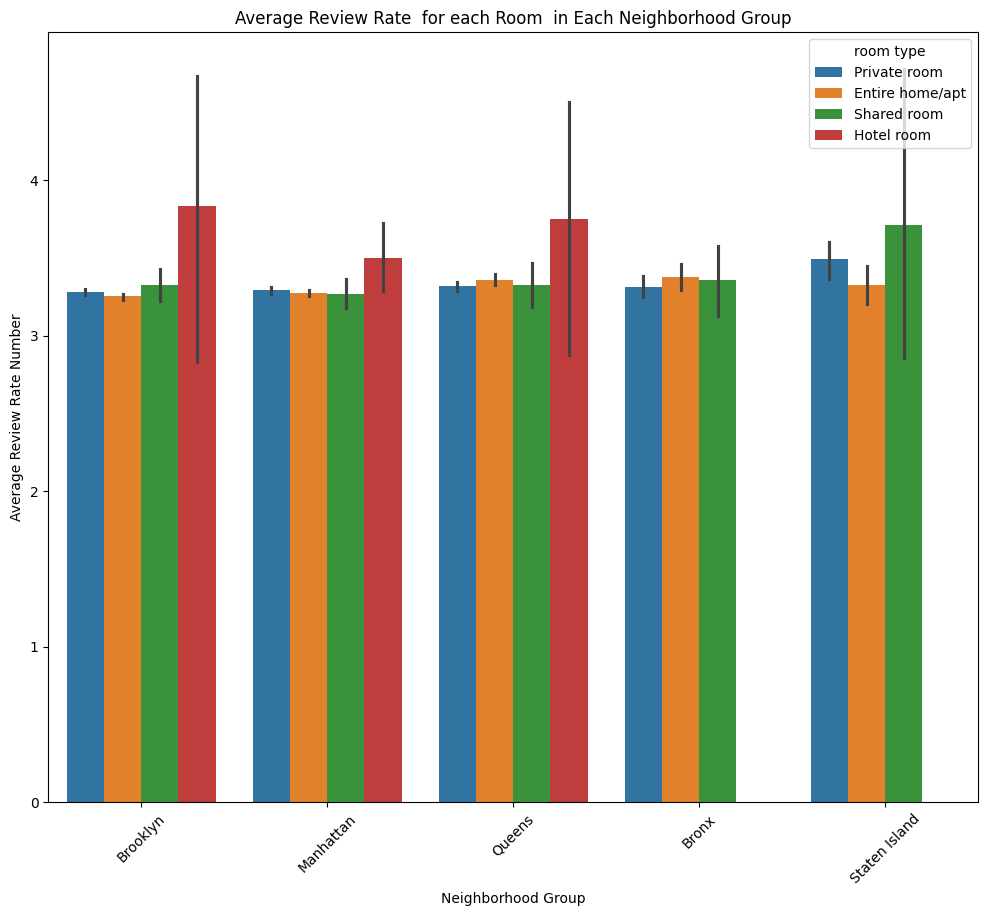

In [79]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate  for each Room  in Each Neighborhood Group')
plt.xticks(rotation=45)
plt.show()

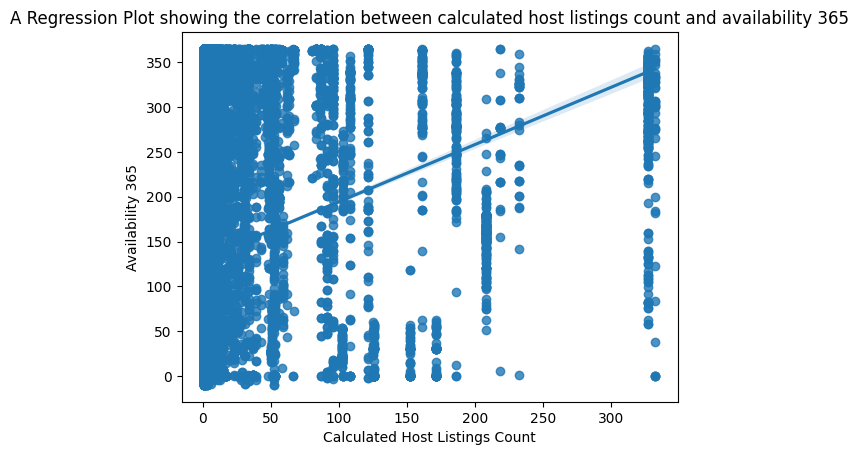

In [80]:
#Are hosts with a higher calculsted host listings count more likely to maintain higheer availabilty throughout the year?
sns.regplot(data=df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('Availability 365');
plt.title('A Regression Plot showing the correlation between calculated host listings count and availability 365');

In [81]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.14857327574146945)